In [1]:
import pandas as pd

In [3]:
data = pd.read_pickle('/home/dnair2m/evidential_regression/cached_uci_results.pkl')


In [48]:
data['Error'] = abs(data['Target'] - data['Mu'])
data["lower"] = data["Mu"] - 2*data["Sigma"]
data["lower"].mask(data["Method"]=="Laplace", data["Mu"] - 3*data["Sigma"], inplace=True)
data["upper"] = data["Mu"] + 2*data["Sigma"]
data["upper"].mask(data["Method"]=="Laplace", data["Mu"] + 3*data["Sigma"], inplace=True)

data["Interval Score"] = data["upper"] - data["lower"] \
 + (2/0.95)*(data["lower"]-data["Target"])*(data["Target"]<data["lower"]) \
 + (2/0.95)*(data["Target"] - data["upper"])*(data["Target"]>data["upper"])


In [30]:
methods = data.Method.unique()
datasets = data.Dataset.unique()
print (methods, datasets)


['Laplace' 'Evidential' 'Ensemble' 'Gaussian'] ['yacht' 'boston' 'concrete' 'energy-efficiency' 'kin8nm' 'naval'
 'power-plant' 'protein' 'wine']


In [49]:
df_pred = pd.DataFrame(columns=["Dataset", "Method", "Error", "Interval Score"])
for dataset_name in datasets:
    for method_name in methods:    
        per_dataset_method = data[(data['Dataset'] == dataset_name) & (data['Method'] == method_name)]
        print (per_dataset_method.shape,)
        l = len(per_dataset_method)
        for i in range(20):
            lower_range = i*int(l/20)
            upper_range = lower_range + int(l/20)
            single_run = per_dataset_method[lower_range:upper_range]
            #print (dataset_name, method_name, i, single_run['Error'].mean())
            df_pred=df_pred.append({"Dataset":dataset_name,
                                    "Method":method_name,
                                    "Error":single_run['Error'].mean(),
                                    "Interval Score":single_run['Interval Score'].mean()},
                           ignore_index=True)

(620, 9)
(620, 9)
(620, 9)
(620, 9)
(2020, 9)
(2020, 9)
(2020, 9)
(2020, 9)
(2060, 9)
(2060, 9)
(2060, 9)
(2060, 9)
(1540, 9)
(1540, 9)
(1540, 9)
(1540, 9)
(16380, 9)
(16380, 9)
(16380, 9)
(16380, 9)
(23860, 9)
(23860, 9)
(23860, 9)
(23860, 9)
(19140, 9)
(19140, 9)
(19140, 9)
(19140, 9)
(91460, 9)
(91460, 9)
(91460, 9)
(91460, 9)
(6400, 9)
(6400, 9)
(6400, 9)
(6400, 9)


In [50]:
df_pred.head()

,Dataset,Method,Error,Interval Score
0,yacht,Laplace,0.053107,0.382344
1,yacht,Laplace,0.139764,0.494111
2,yacht,Laplace,0.061252,0.348415
3,yacht,Laplace,0.104562,0.525713
4,yacht,Laplace,0.110498,0.538927


In [37]:
import seaborn as sns

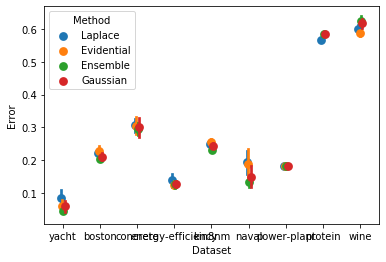

In [41]:
sns.pointplot(y='Error', x='Dataset', hue='Method',
              data=df_pred,
             join=False,
             dodge=True,
             ci='sd')

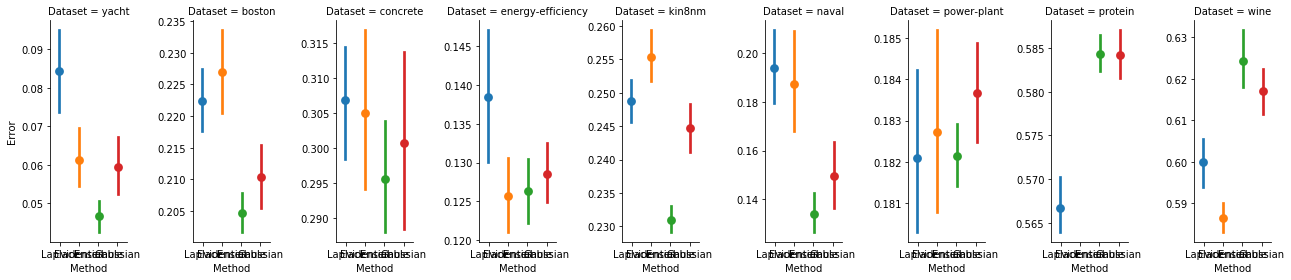

In [60]:
g = sns.catplot(y='Error', x='Method', hue='Method',
                 col="Dataset",
                data=df_pred, kind="point",
                dodge=True, sharey=False,
                height=4, aspect=.5, legend_out=True);
#g.get_legend().remove()
# Improve the legend 
#handles, labels = g.get_legend_handles_labels()
#print (labels)
#fig.legend(handles, labels, bbox_to_anchor=(0.5, 0.85), loc='lower center', ncol=4, fancybox=True, shadow=True)



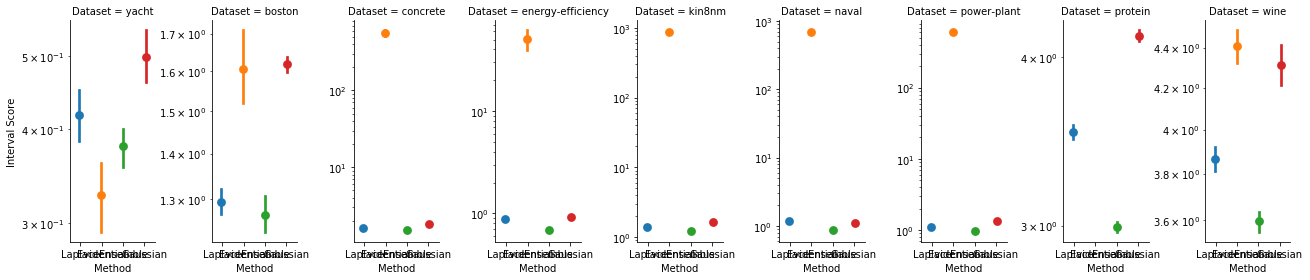

In [57]:
g = sns.catplot(y='Interval Score', x='Method', hue='Method',
                 col="Dataset",
                data=df_pred, kind="point",
                dodge=True, sharey=False,
                height=4, aspect=.5);
g.set(yscale="log")